In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=ToTensor()
)

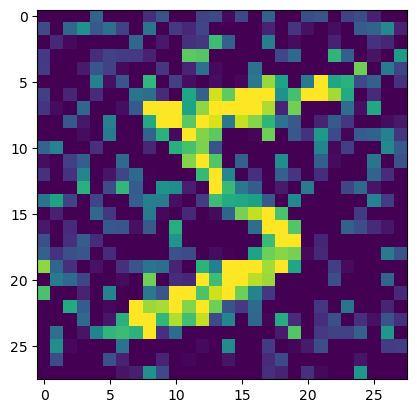

In [55]:
img = training_data.data[0] / 255.0

import matplotlib.pyplot as plt

plt.imshow(torch.clip(torch.randn_like(img) * 0.3 + img, 0, 1) )
plt.show()

In [3]:
import torch
from torch import nn
import torch.nn.functional as F

In [20]:
class My_CNN(nn.Module):
    def __init__(self, activation="relu"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.c0 = nn.Conv2d(1, 16, 3, 1)
        self.c1 = nn.Conv2d(16, 16, 3, 1)
        self.c2 = nn.Conv2d(16, 16, 3, 1)
        self.c3 = nn.Conv2d(16, 16, 3, 1)
        self.c4 = nn.Conv2d(16, 32, 3, 1)
        self.c5 = nn.Conv2d(32, 32, 3, 1)
        self.c6 = nn.Conv2d(32, 32, 3, 1)
        self.c7 = nn.Conv2d(32, 32, 3, 1)
        self.c8 = nn.Conv2d(32, 64, 3, 1)
        self.c9 = nn.Conv2d(64, 64, 3, 1)
        self.c10 = nn.Conv2d(64, 128, 4, 2)
        self.c11 = nn.Conv2d(128, 128, 3, 1)
        self.fln = nn.Flatten()
        self.l0 = nn.Linear(128, 128)
        self.l1 = nn.Linear(128, 10)

    def forward(self, x):
        h = self.activation(self.c0(x))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.activation(self.c3(h))
        h = self.activation(self.c4(h))
        h = self.activation(self.c5(h))
        h = self.activation(self.c6(h))
        h = self.activation(self.c7(h))
        h = self.activation(self.c8(h))
        h = self.activation(self.c9(h))
        h = self.activation(self.c10(h))
        h = self.activation(self.c11(h))
        h = self.fln(h)
        h = self.activation(self.l0(h))
        h = self.l1(h)
        return h

    def get_perceptual_loss(self, x):
        h0 = self.activation(self.c0(x))
        h1 = self.activation(self.c1(h0))
        h2 = self.activation(self.c2(h1))
        h3 = self.activation(self.c3(h2))
        h4 = self.activation(self.c4(h3))
        h5 = self.activation(self.c5(h4))
        h6 = self.activation(self.c6(h5))
        h7 = self.activation(self.c7(h6))
        h8 = self.activation(self.c8(h7))
        h9 = self.activation(self.c9(h8))
        h10 = self.activation(self.c10(h9))
        h11 = self.activation(self.c11(h10))
        return h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11


class My_Encoder(nn.Module):
    def __init__(self, dim_encoder_output, activation="tanh"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.fln = nn.Flatten()
        self.l0 = nn.Linear(784, 512)
        self.l1 = nn.Linear(512, 512)
        self.l2 = nn.Linear(512, dim_encoder_output)

    def forward(self, x):
        x = self.fln(x)
        h = self.activation(self.l0(x))
        h = self.activation(self.l1(h))
        z = self.l2(h)
        return z


class My_Decoder(nn.Module):
    def __init__(self, dim_decoder_input, activation="tanh"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.l0 = nn.Linear(dim_decoder_input, 512)
        self.l1 = nn.Linear(512, 512)
        self.l2 = nn.Linear(512, 784)
        self.unfln = nn.Unflatten(1, [1, 28, 28])

    def forward(self, z):
        x_hat = self.activation(self.l0(z))
        x_hat = self.activation(self.l1(x_hat))
        x_hat = torch.sigmoid(self.l2(x_hat))
        x_hat = self.unfln(x_hat)
        return x_hat

In [24]:
tmp_model = My_CNN()
with torch.no_grad():
    for x, y in dataloader:
        pred = tmp_model(x)
        print(pred.shape)
        break

torch.Size([128, 128, 1, 1])
torch.Size([128, 10])


In [5]:
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(training_data, batch_size=128, shuffle=True)

In [117]:
class My_CNN(nn.Module):
    def __init__(self, activation="relu"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.c0 = nn.Conv2d(1, 16, 3, 2, padding=1)
        self.c1 = nn.Conv2d(16, 32, 3, 2, padding=1)
        self.c2 = nn.Conv2d(32, 64, 3, 1)
        self.c3 = nn.Conv2d(64, 128, 4, 2)
        self.fln = nn.Flatten()
        self.l0 = nn.Linear(128, 128)
        self.l1 = nn.Linear(128, 10)

    def forward(self, x):
        h = self.activation(self.c0(x))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.activation(self.c3(h))
        h = self.fln(h)
        h = self.activation(self.l0(h))
        h = self.l1(h)
        return h

    def get_perceptual_loss(self, x):
        h0 = self.activation(self.c0(x))
        h1 = self.activation(self.c1(h0))
        h2 = self.activation(self.c2(h1))
        h3 = self.activation(self.c3(h2))
        return h0,h1,h2,h3

In [125]:
class My_VGG(nn.Module):
    def __init__(self, activation="relu"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.c0 = nn.Conv2d(1, 64, 3, 2, padding=1)
        self.c1 = nn.Conv2d(64, 64, 3, 2, padding=1)
        self.c2 = nn.Conv2d(64, 128, 3, 1)
        self.c3 = nn.Conv2d(128, 128, 4, 2)
        self.fln = nn.Flatten()
        self.l0 = nn.Linear(128, 128)
        self.l1 = nn.Linear(128, 10)

    def forward(self, x):
        h = self.activation(self.c0(x))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.activation(self.c3(h))
        h = self.fln(h)
        h = self.activation(self.l0(h))
        h = self.l1(h)
        return h

    def get_perceptual_loss(self, x):
        h0 = self.activation(self.c0(x))
        h1 = self.activation(self.c1(h0))
        h2 = self.activation(self.c2(h1))
        h3 = self.activation(self.c3(h2))
        return h0,h1,h2,h3

In [126]:


pl_model = My_VGG()
optimizer = torch.optim.Adam(pl_model.parameters())

In [12]:
def get_cuda_device_or_cpu():
    if torch.cuda.is_available():
        cuda_count = torch.cuda.device_count()

        no = 0
        mem_available = 0

        for i in range(cuda_count):
            tmp_available = torch.cuda.mem_get_info(i)[0]
            if mem_available < tmp_available:
                no = i
                mem_available = tmp_available
        return f"cuda:{no}"
    return "cpu"

In [15]:
from tqdm import tqdm
device = get_cuda_device_or_cpu()
print(device)

cuda:1


In [127]:
pl_model.train()
pl_model.to(device)

for epoch in range(30):
    tl = 0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        pred = pl_model(torch.clip(torch.randn_like(x) * 0.3 + x, 0, 1))
        # pred = pl_model(x)
        loss = F.cross_entropy(pred, y)
        tl += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'{epoch}: {tl}')

0: 154.06347070261836
1: 46.529663883149624
2: 32.95650256564841
3: 26.057712871115655
4: 22.569647897034883
5: 19.264764729538
6: 17.402652082731947
7: 15.169661090825684
8: 13.820169370155782
9: 12.34668514173245
10: 12.236132102436386
11: 11.21336647233693
12: 10.913472756830743
13: 9.450551147543592
14: 9.348734395520296
15: 8.59689038610668
16: 7.538611582684098
17: 7.660521589888958
18: 8.079986566081061
19: 6.149736550374655
20: 6.895346070246887
21: 7.762246969767148
22: 6.082901583402418
23: 6.184870010547456
24: 5.511069429921918
25: 6.4306168913899455
26: 5.1875535673352715
27: 5.492235870813602
28: 4.933802451931115
29: 4.788041730069381


In [24]:
import matplotlib.pyplot as plt

from myAE import Manager

import torch
from torch import nn
import torch.nn.functional as F

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [116]:

class My_Encoder(nn.Module):
    def __init__(self, dim_encoder_output, activation="tanh"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.c0 = nn.Conv2d(1, 16, 3, 2, padding=1)
        self.c1 = nn.Conv2d(16, 32, 3, 2, padding=1)
        self.c2 = nn.Conv2d(32, 64, 3, 2, padding=1)
        self.c3 = nn.Conv2d(64, 128, 3, 2, padding=1)
        self.fln = nn.Flatten()
        self.l0 = nn.Linear(512, dim_encoder_output)

    def forward(self, x):
        h = self.activation(self.c0(x))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.activation(self.c3(h))
        h = self.fln(h)
        z = self.l0(h)
        return z


class My_Decoder(nn.Module):
    def __init__(self, dim_decoder_input, activation="tanh"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.l0 = nn.Linear(dim_decoder_input, 512)
        self.c0 = nn.ConvTranspose2d(
            128, 64, kernel_size=3, stride=2, padding=1, output_padding=1
        )
        self.c1 = nn.ConvTranspose2d(
            64, 32, kernel_size=3, stride=2, padding=1, output_padding=1
        )
        self.c2 = nn.ConvTranspose2d(
            32, 16, kernel_size=3, stride=2, padding=1, output_padding=1
        )
        self.c3 = nn.ConvTranspose2d(
            16, 8, kernel_size=3, stride=2, padding=1, output_padding=1
        )
        # define final convolutional layer to generate output image
        self.c4 = nn.Conv2d(8, 4, kernel_size=3, stride=1)
        self.c5 = nn.Conv2d(4, 1, kernel_size=3, stride=1)

        # self.l0 = nn.Linear(dim_decoder_input, 512)
        # self.l1 = nn.Linear(512, 512)
        # self.l2 = nn.Linear(512, 784)
        # self.unfln = nn.Unflatten(1, [1, 28, 28])

    def forward(self, z):
        h = self.activation(self.l0(z))
        h = h.view(-1, 128, 2, 2)
        h = self.activation(self.c0(h))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.activation(self.c3(h))
        h = self.activation(self.c4(h))
        h = torch.sigmoid(self.c5(h))
        return h

In [115]:
tmp_model = My_Encoder(4)
with torch.no_grad():
    z = tmp_model(torch.rand(10, 1, 28, 28))
print(z.shape)

TypeError: batch_norm() missing 2 required positional arguments: 'running_mean' and 'running_var'

In [25]:
manager = Manager()
manager.prepare_data()

In [132]:
def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    pl_x = pl_model.get_perceptual_loss(x)
    pl_pred = pl_model.get_perceptual_loss(pred)
    ll = 0
    for px, pp in zip(pl_x, pl_pred):
        ll += F.mse_loss(pp, px, reduction='sum') / len(x)
    loss = ll + kl
    return loss

manager.set_default_model(4, 2)
device = get_cuda_device_or_cpu()
pl_model.to(device)
hist = manager.train(calc_loss, epochs=30)
manager.add_model('pl d 64 30')

Now, it is working on cuda:1.


100%|██████████| 30/30 [05:44<00:00, 11.49s/it]


In [111]:
def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

manager.set_model(My_Encoder(4), My_Decoder(2))

hist = manager.train(calc_loss, epochs=30)
manager.add_model('vanilla c 30')

Now, it is working on cuda:1.


100%|██████████| 30/30 [05:55<00:00, 11.85s/it]


In [28]:
def compare_with_vanilla(manager, name, original_name='vanilla 30'):
    fig, (axs1, axs2, axs3) = plt.subplots(nrows=3, ncols=5, figsize=[20, 13])

    manager.swap_current_model(original_name)
    manager.model.to('cpu')
    manager.model.eval()

    for x, y in manager.train_dataloader:
        with torch.no_grad():
            h = manager.model.get_submodule("encoder")(x)
            mu = h[:, :2]
            x_hats = manager.model.get_submodule("decoder")(mu)
        for ax, img in zip(axs1, x[:5]):
            ax.imshow(img.view([28, 28]), cmap='gray', vmin=0, vmax=1)
            ax.axis('off')
        for ax, img in zip(axs2, x_hats):
            ax.imshow(img.view([28, 28]), cmap='gray', vmin=0, vmax=1)
            ax.axis('off')

        
        with torch.no_grad():
            manager.swap_current_model(name)

            manager.model.to('cpu')
            manager.model.eval()

            h = manager.model.get_submodule("encoder")(x)
            mu = h[:, :2]
            x_hats = manager.model.get_submodule("decoder")(mu)
        for ax, img in zip(axs3, x_hats):
            ax.imshow(img.view([28, 28]), cmap='gray', vmin=0, vmax=1)
            ax.axis('off')
        
        break
    plt.tight_layout()

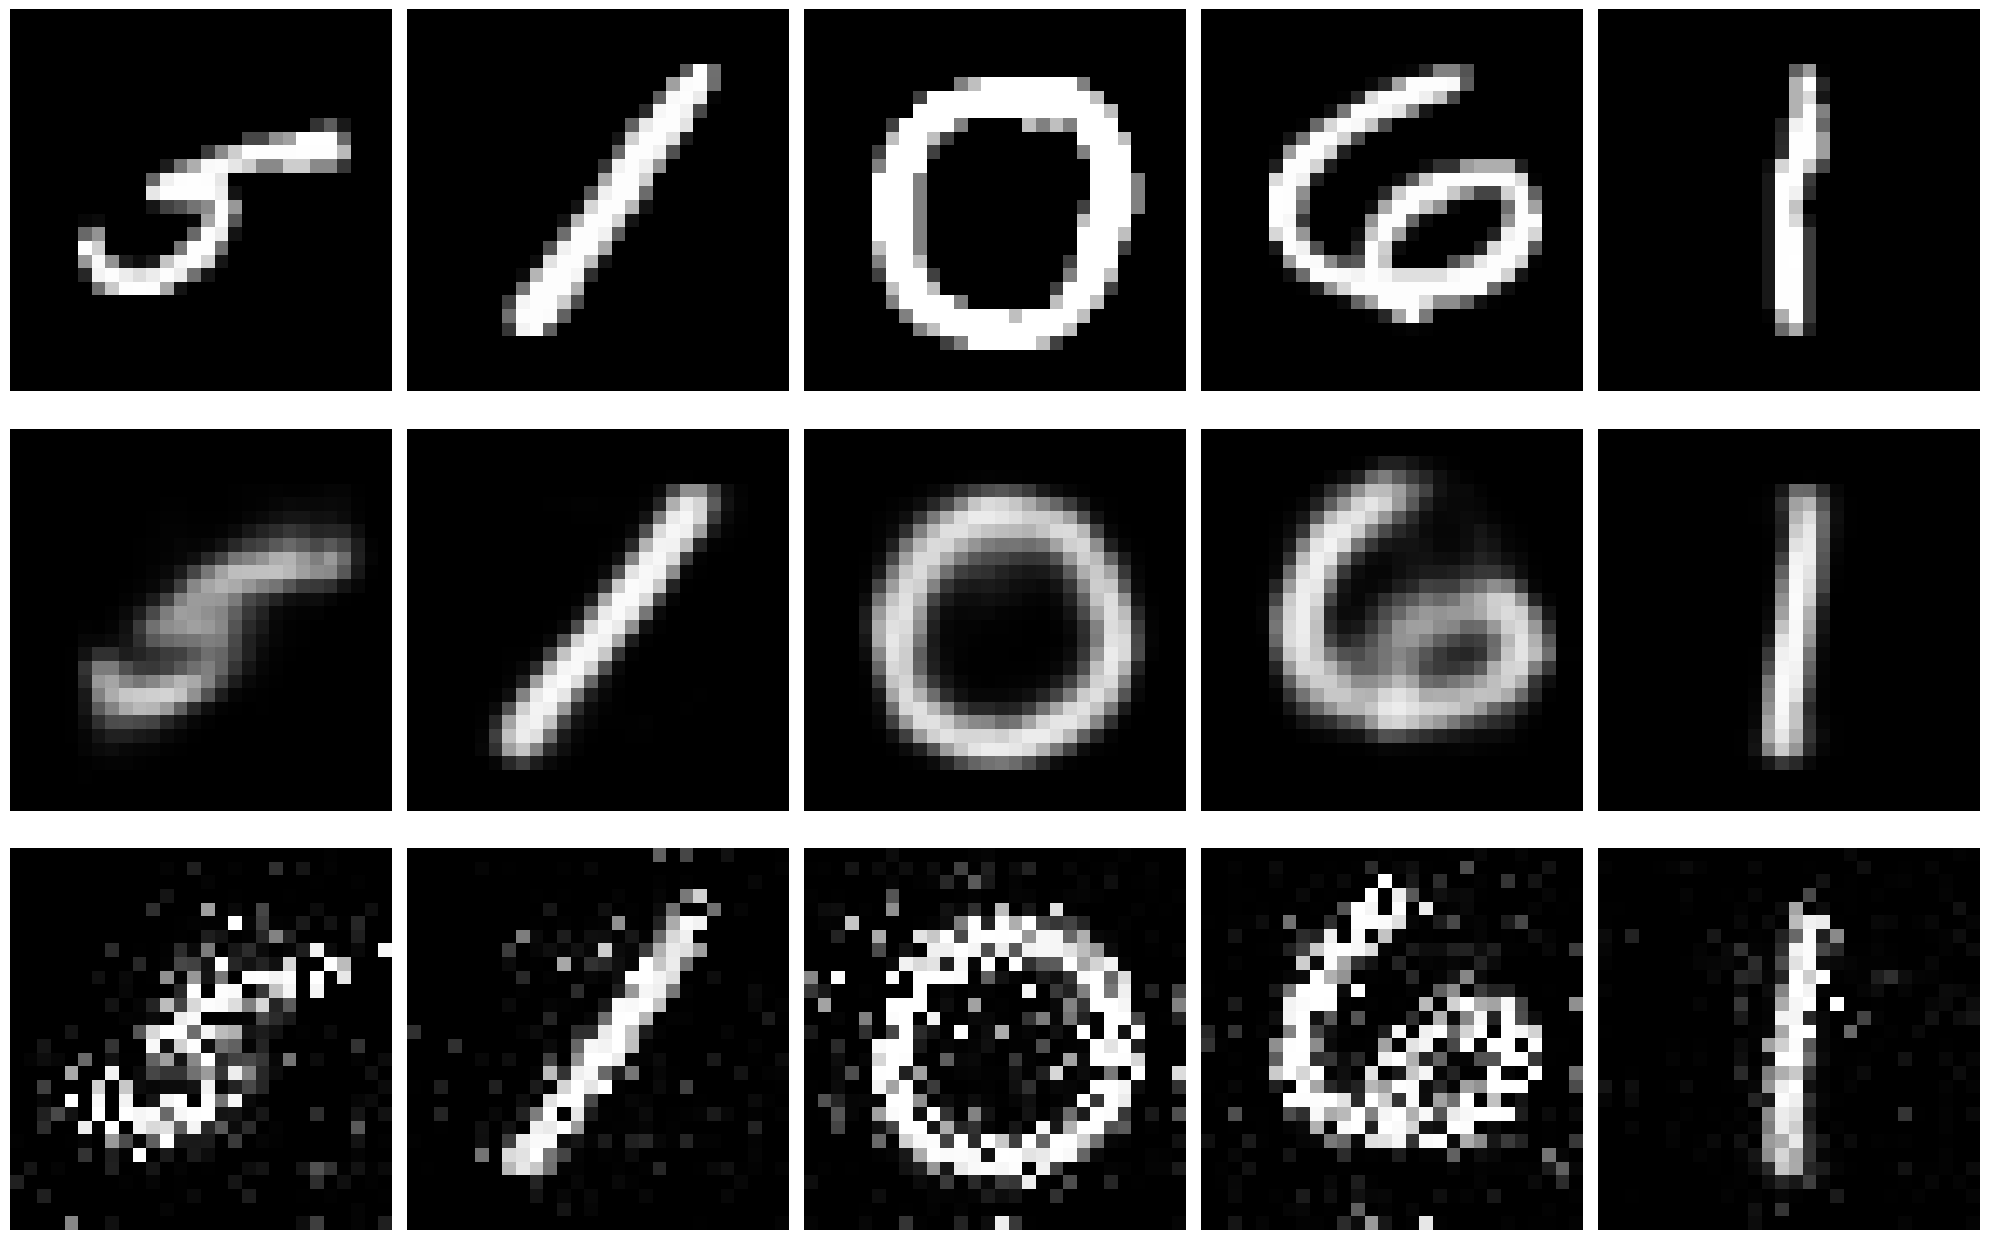

In [133]:
compare_with_vanilla(manager, 'pl d 64 30', 'vanilla 30')
# cnn 64 첫 체널 디노이징

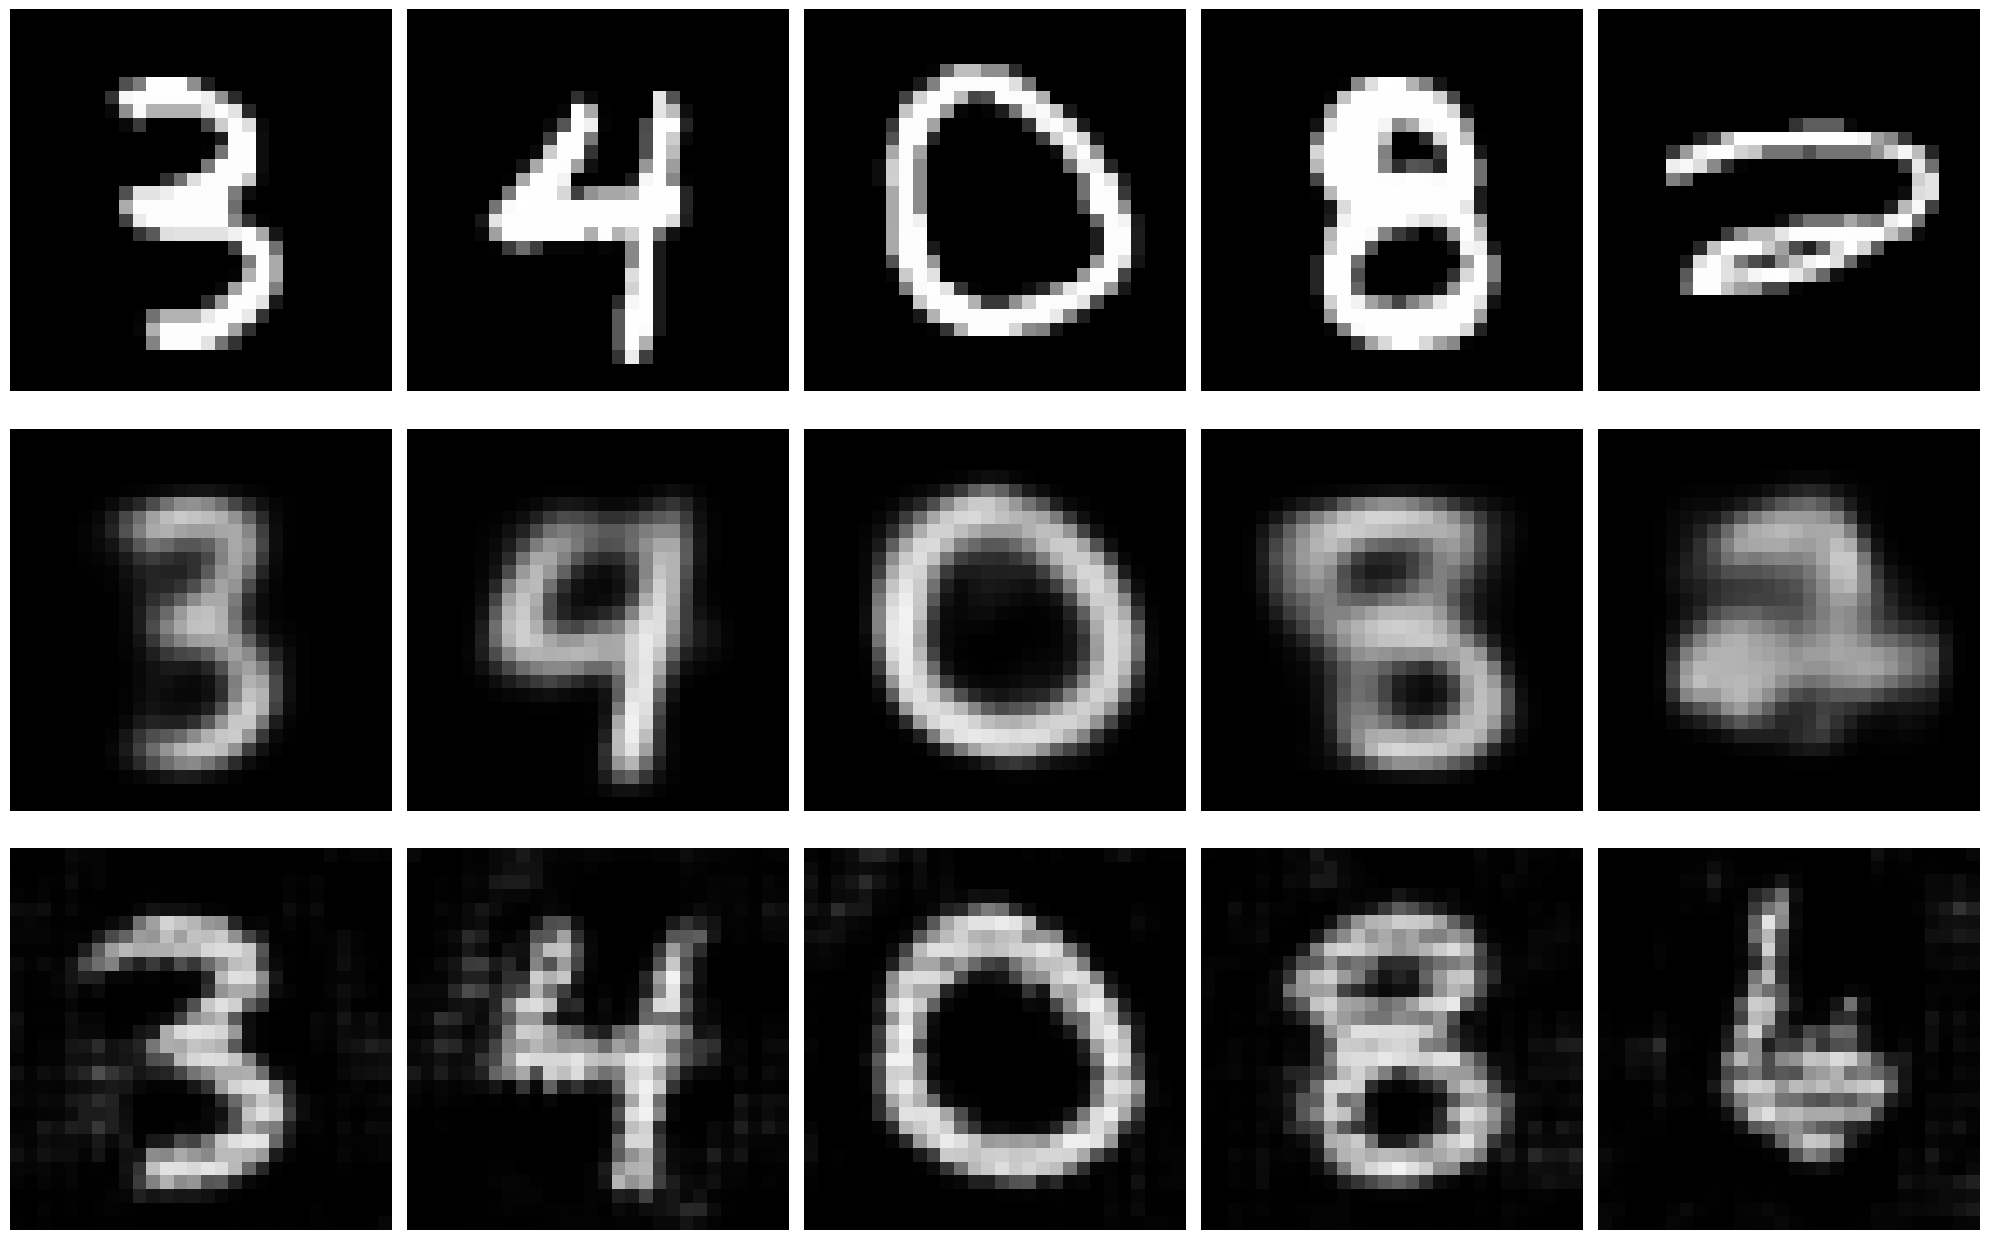

In [131]:
compare_with_vanilla(manager, 'pl 64 30', 'vanilla c 30')
# cnn 64 첫 체널 디노이징 tanh, 콘볼루션오토인코더

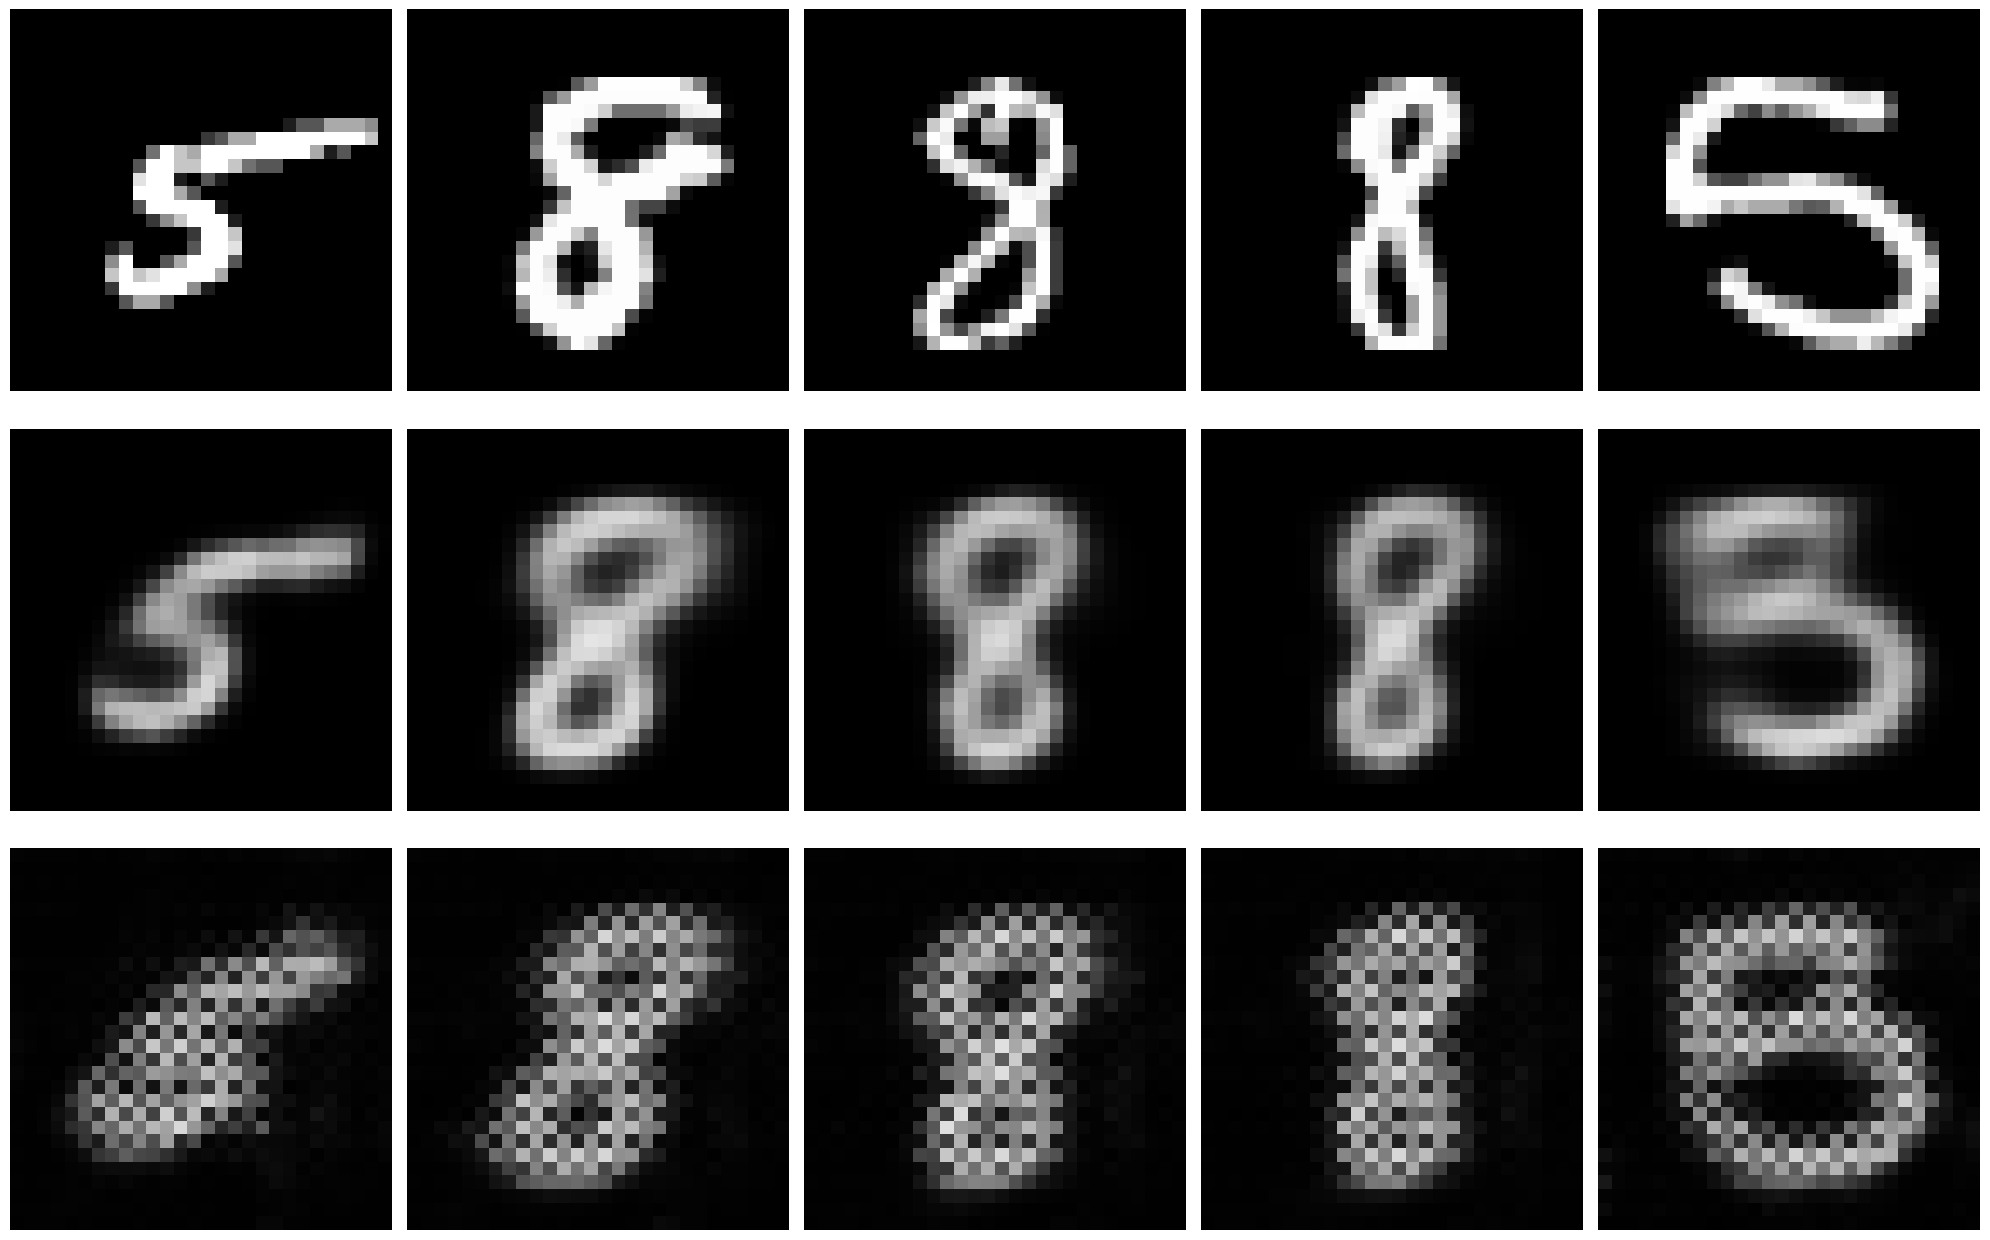

In [124]:
compare_with_vanilla(manager, 'pl mean 100 30', 'vanilla c 30')
# cnn 디노이징 tanh, 콘볼루션오토인코더, 평균 * 100 

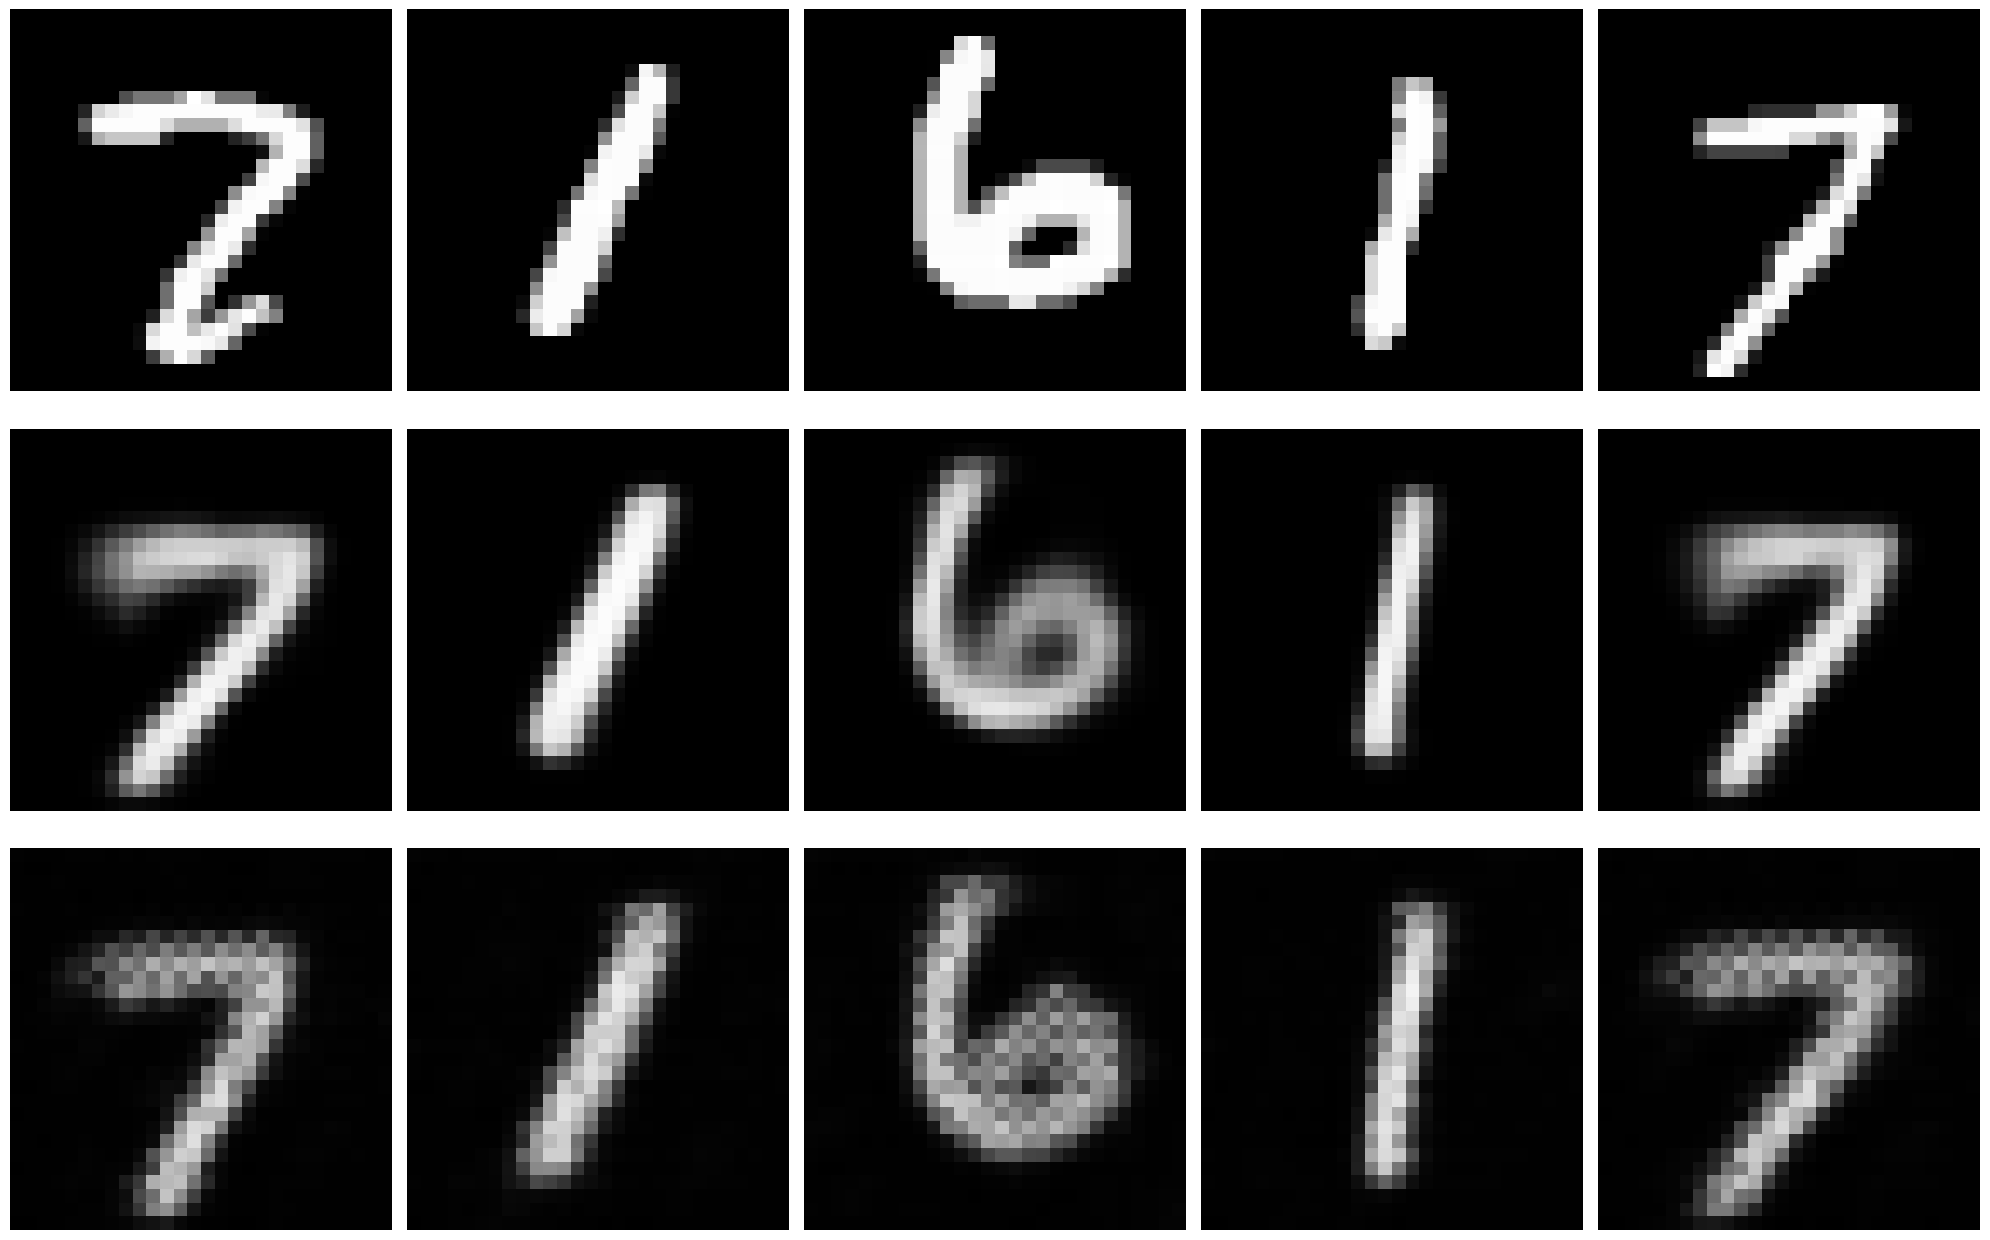

In [121]:
compare_with_vanilla(manager, 'pl tanh 30', 'vanilla c 30')
# cnn 디노이징 tanh, 콘볼루션오토인코더

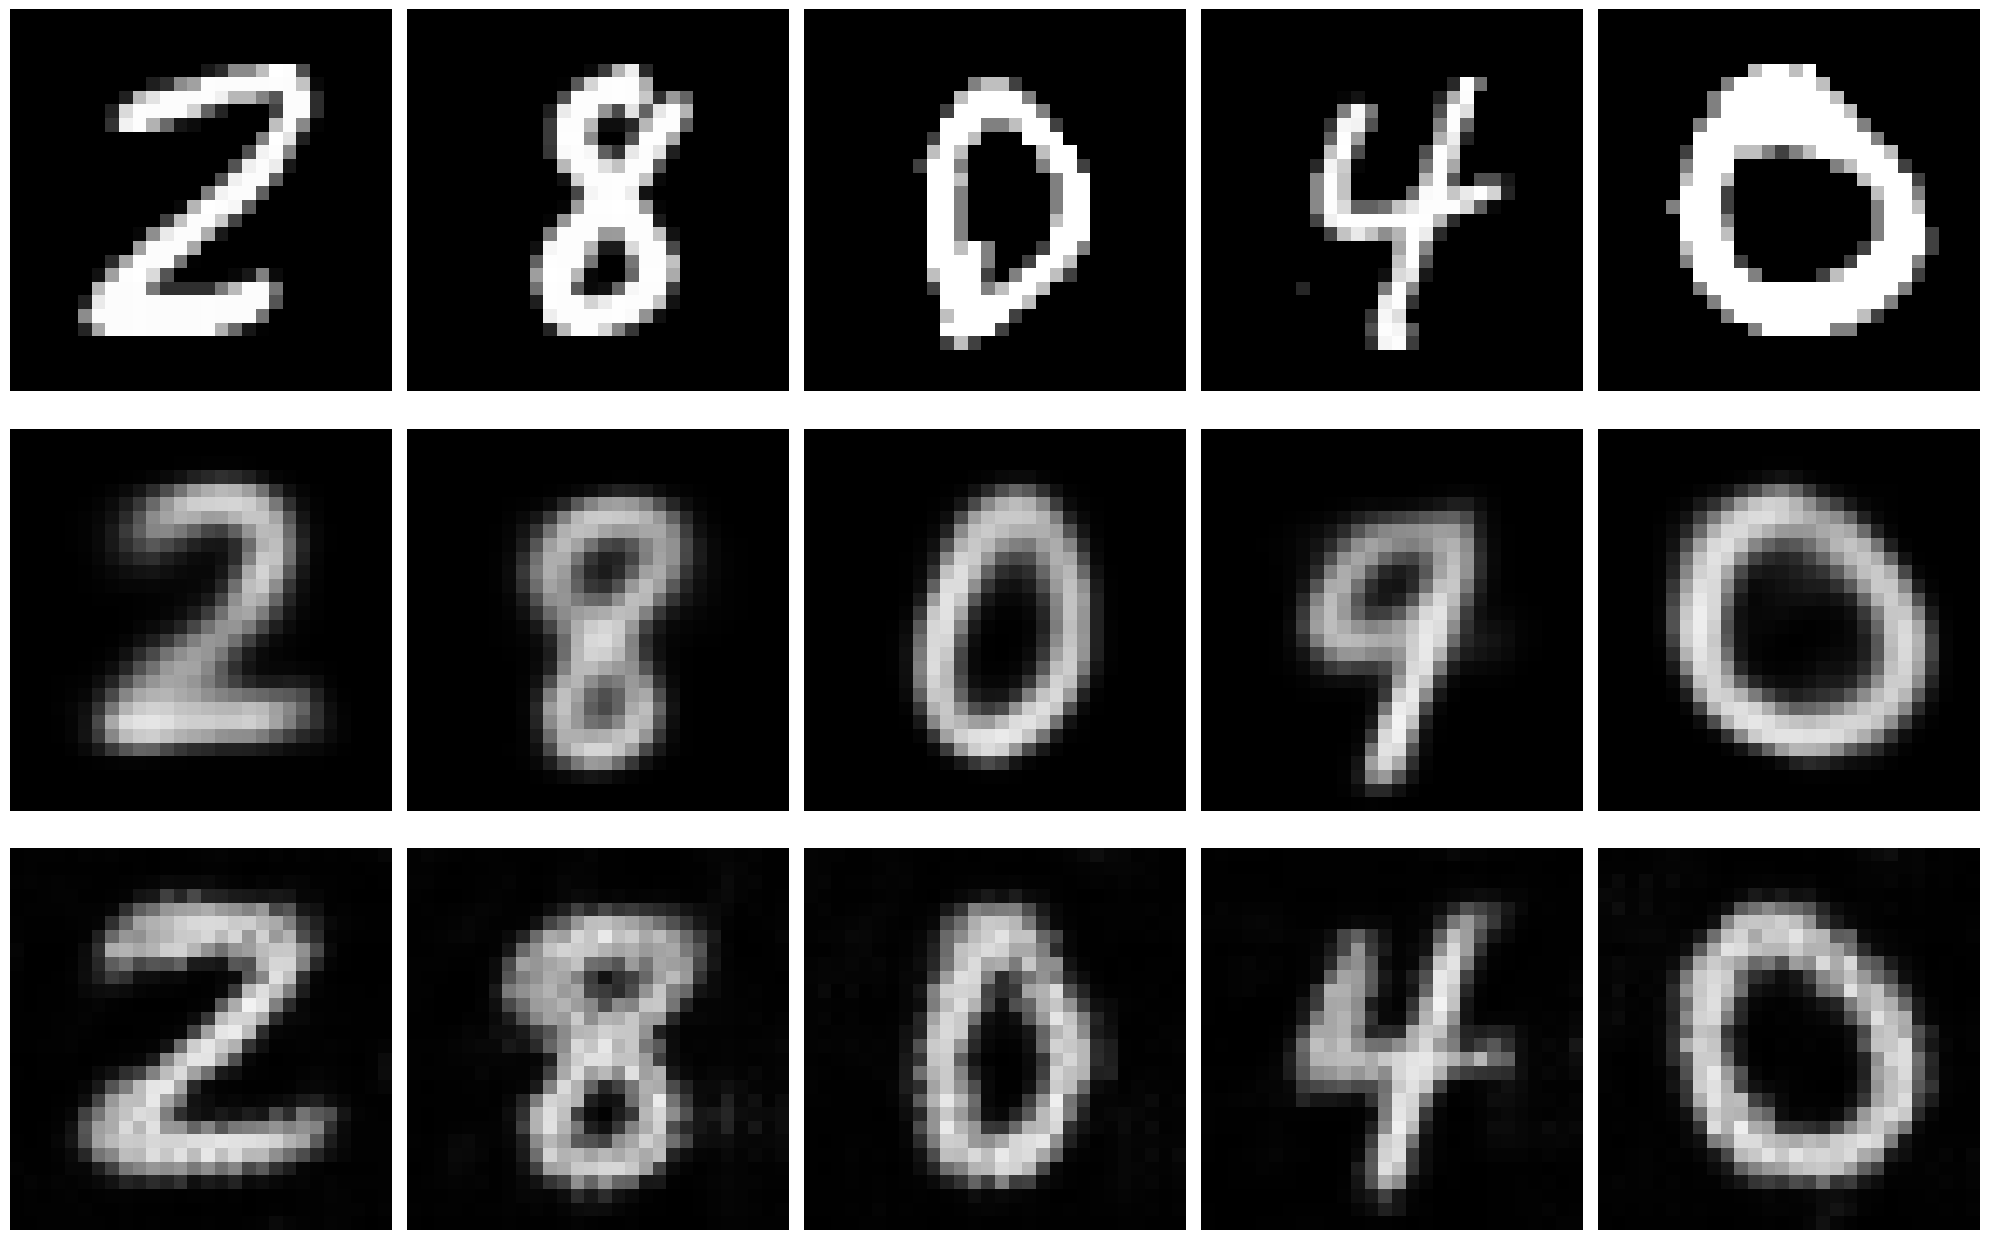

In [112]:
compare_with_vanilla(manager, 'pl 30', 'vanilla c 30')
# cnn 디노이징, 콘볼루션오토인코더

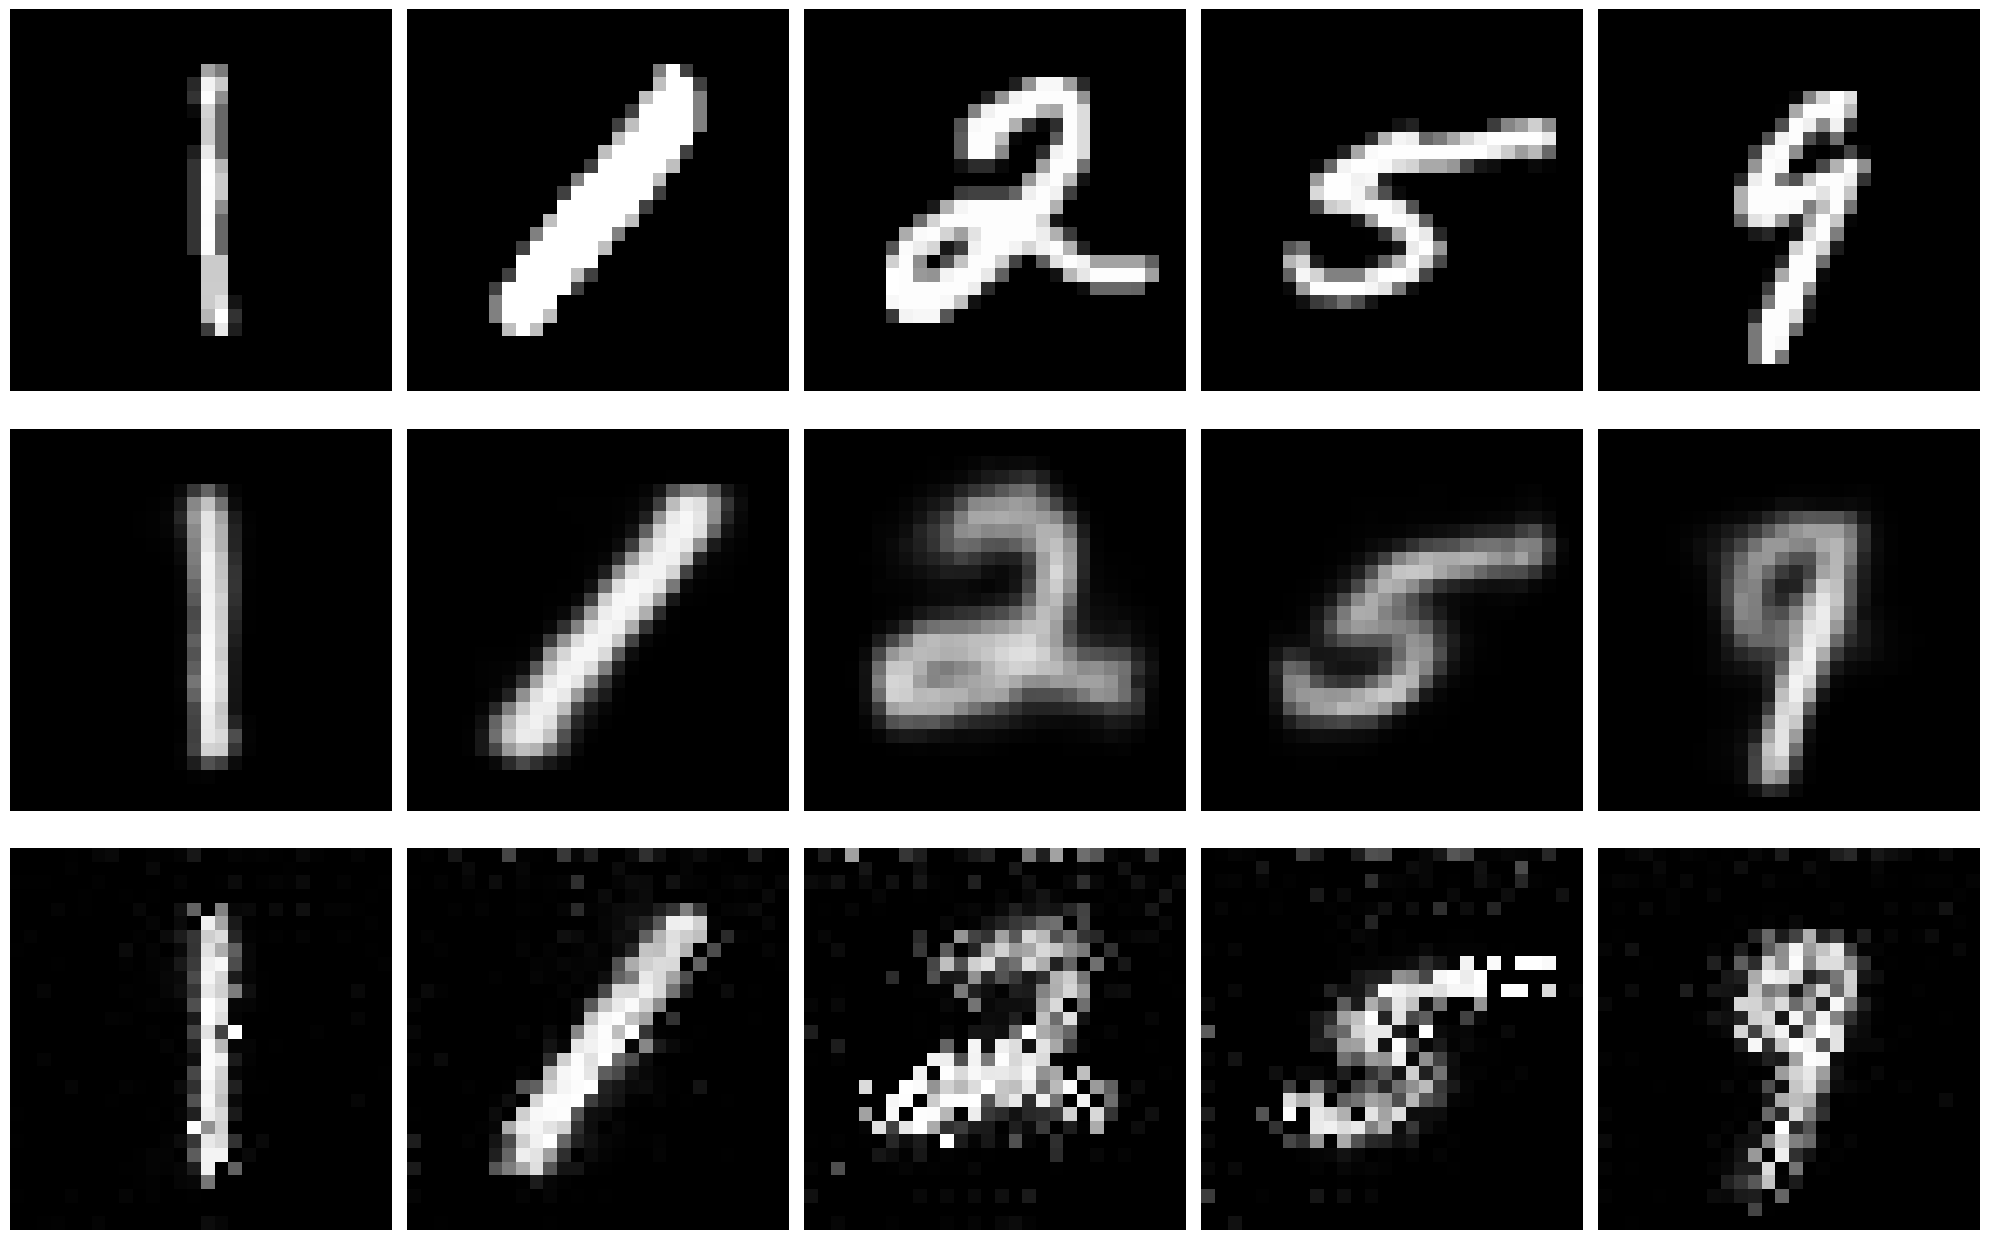

In [38]:
compare_with_vanilla(manager, 'pl 30')
# cnn 커널사이즈 4

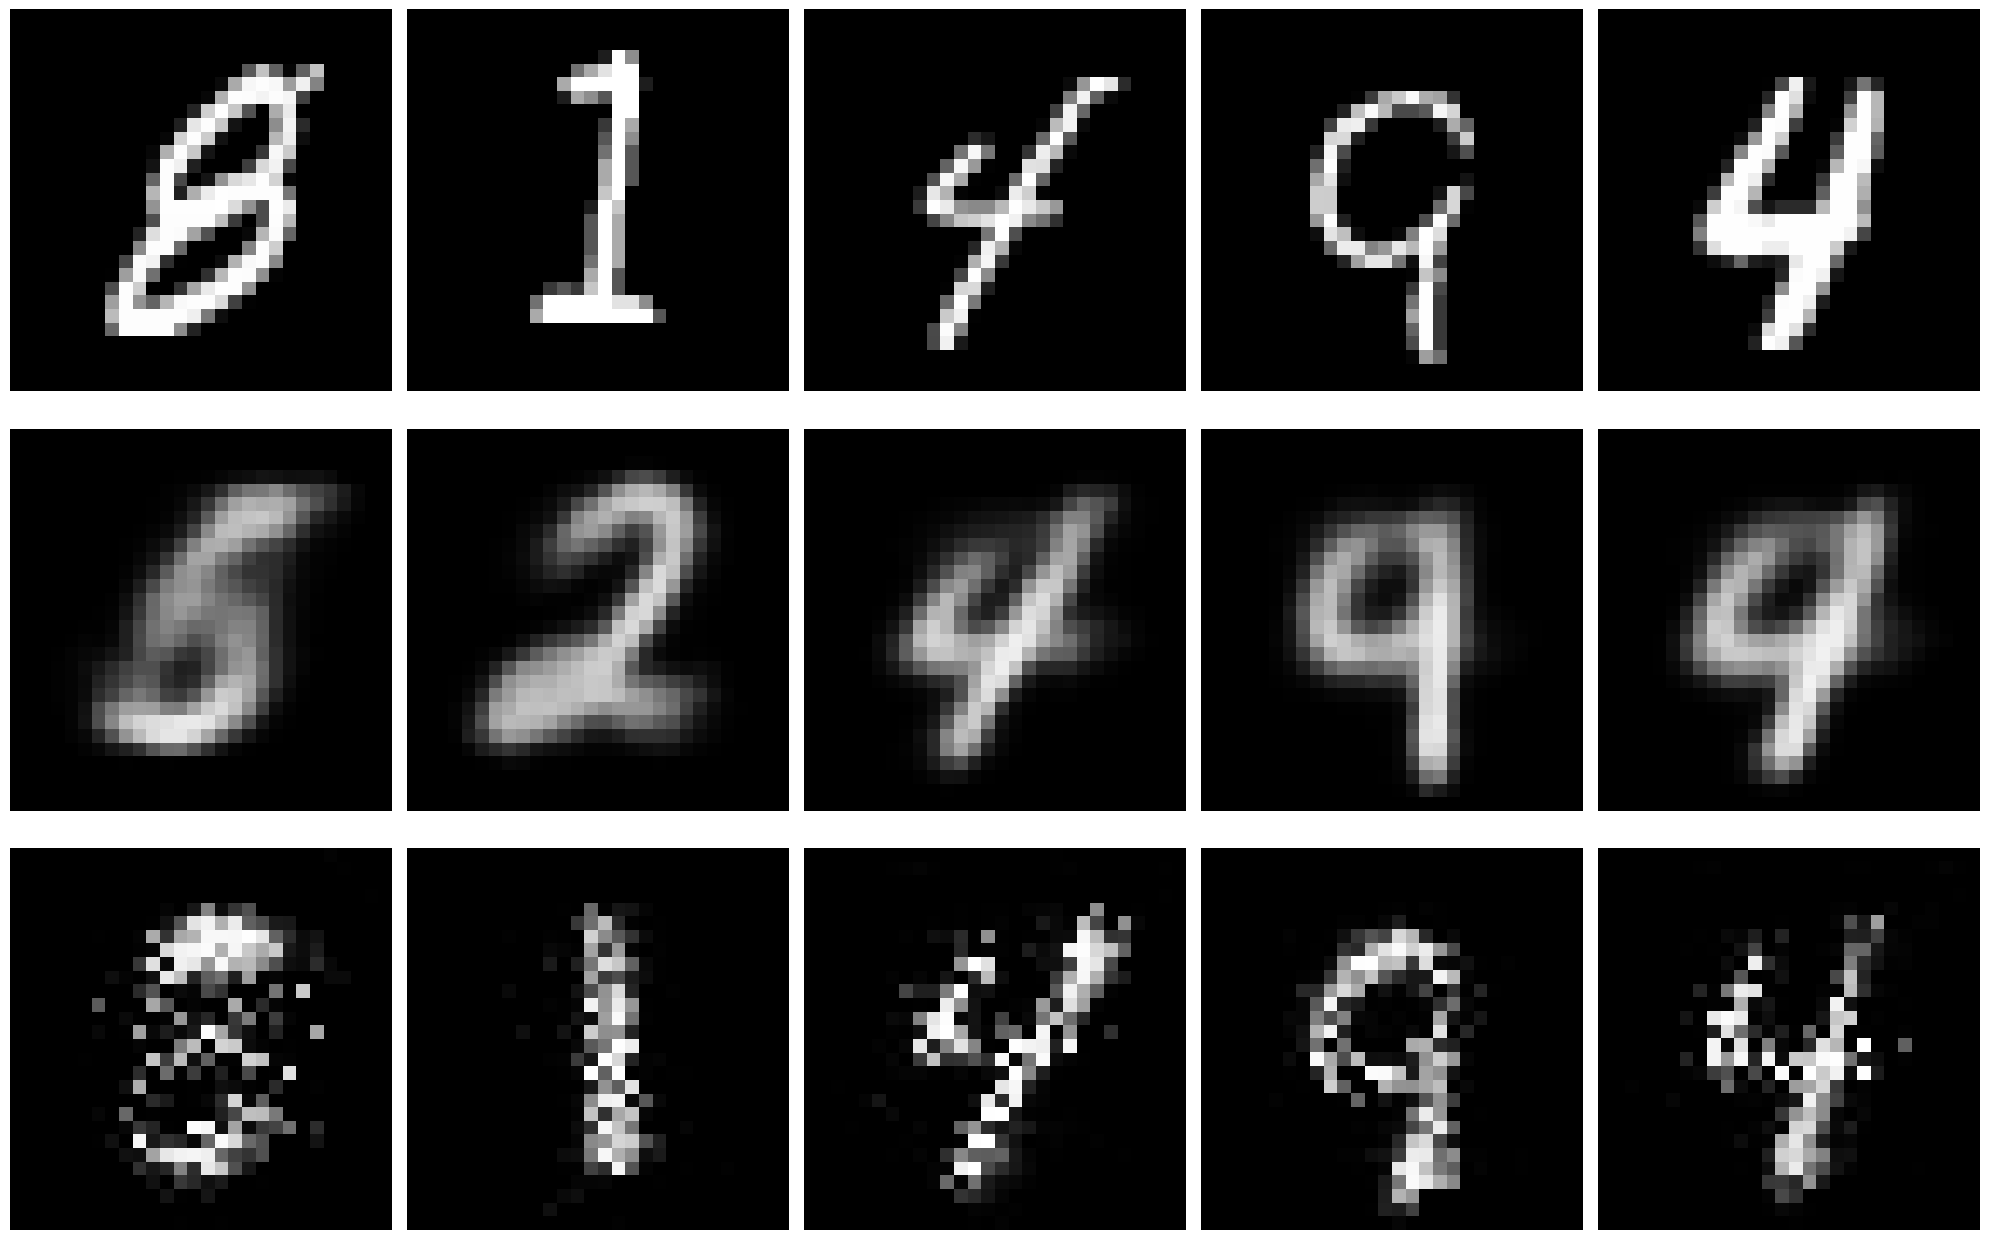

In [29]:
compare_with_vanilla(manager, 'pl 30')
# cnn 스트라이드를 1로 여러 레이어를 동원

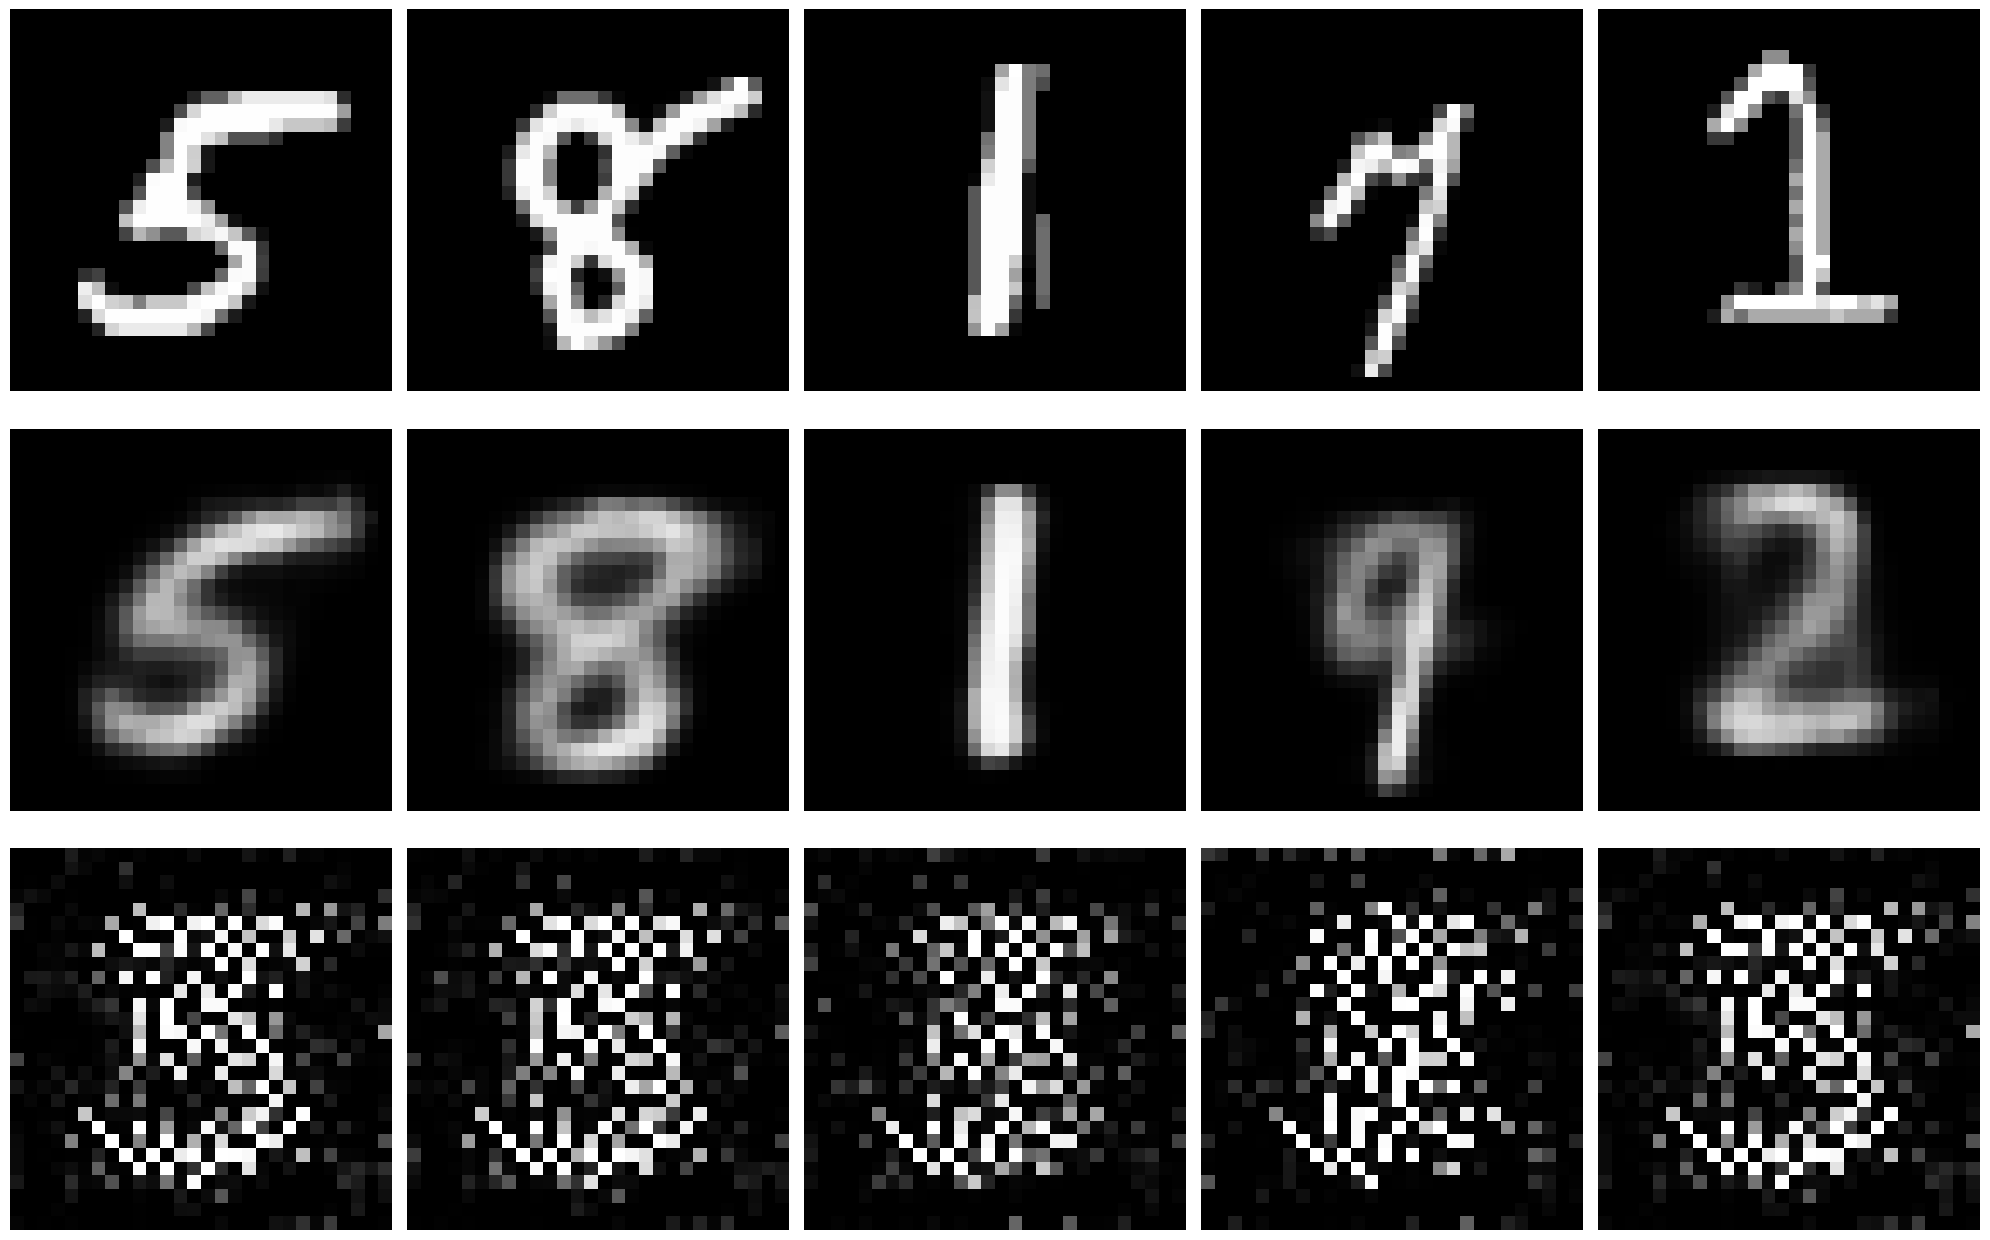

In [16]:
compare_with_vanilla(manager, 'pl 30')
# denoising cnn, 리컨 로스를 썸하지 않고 민을 함

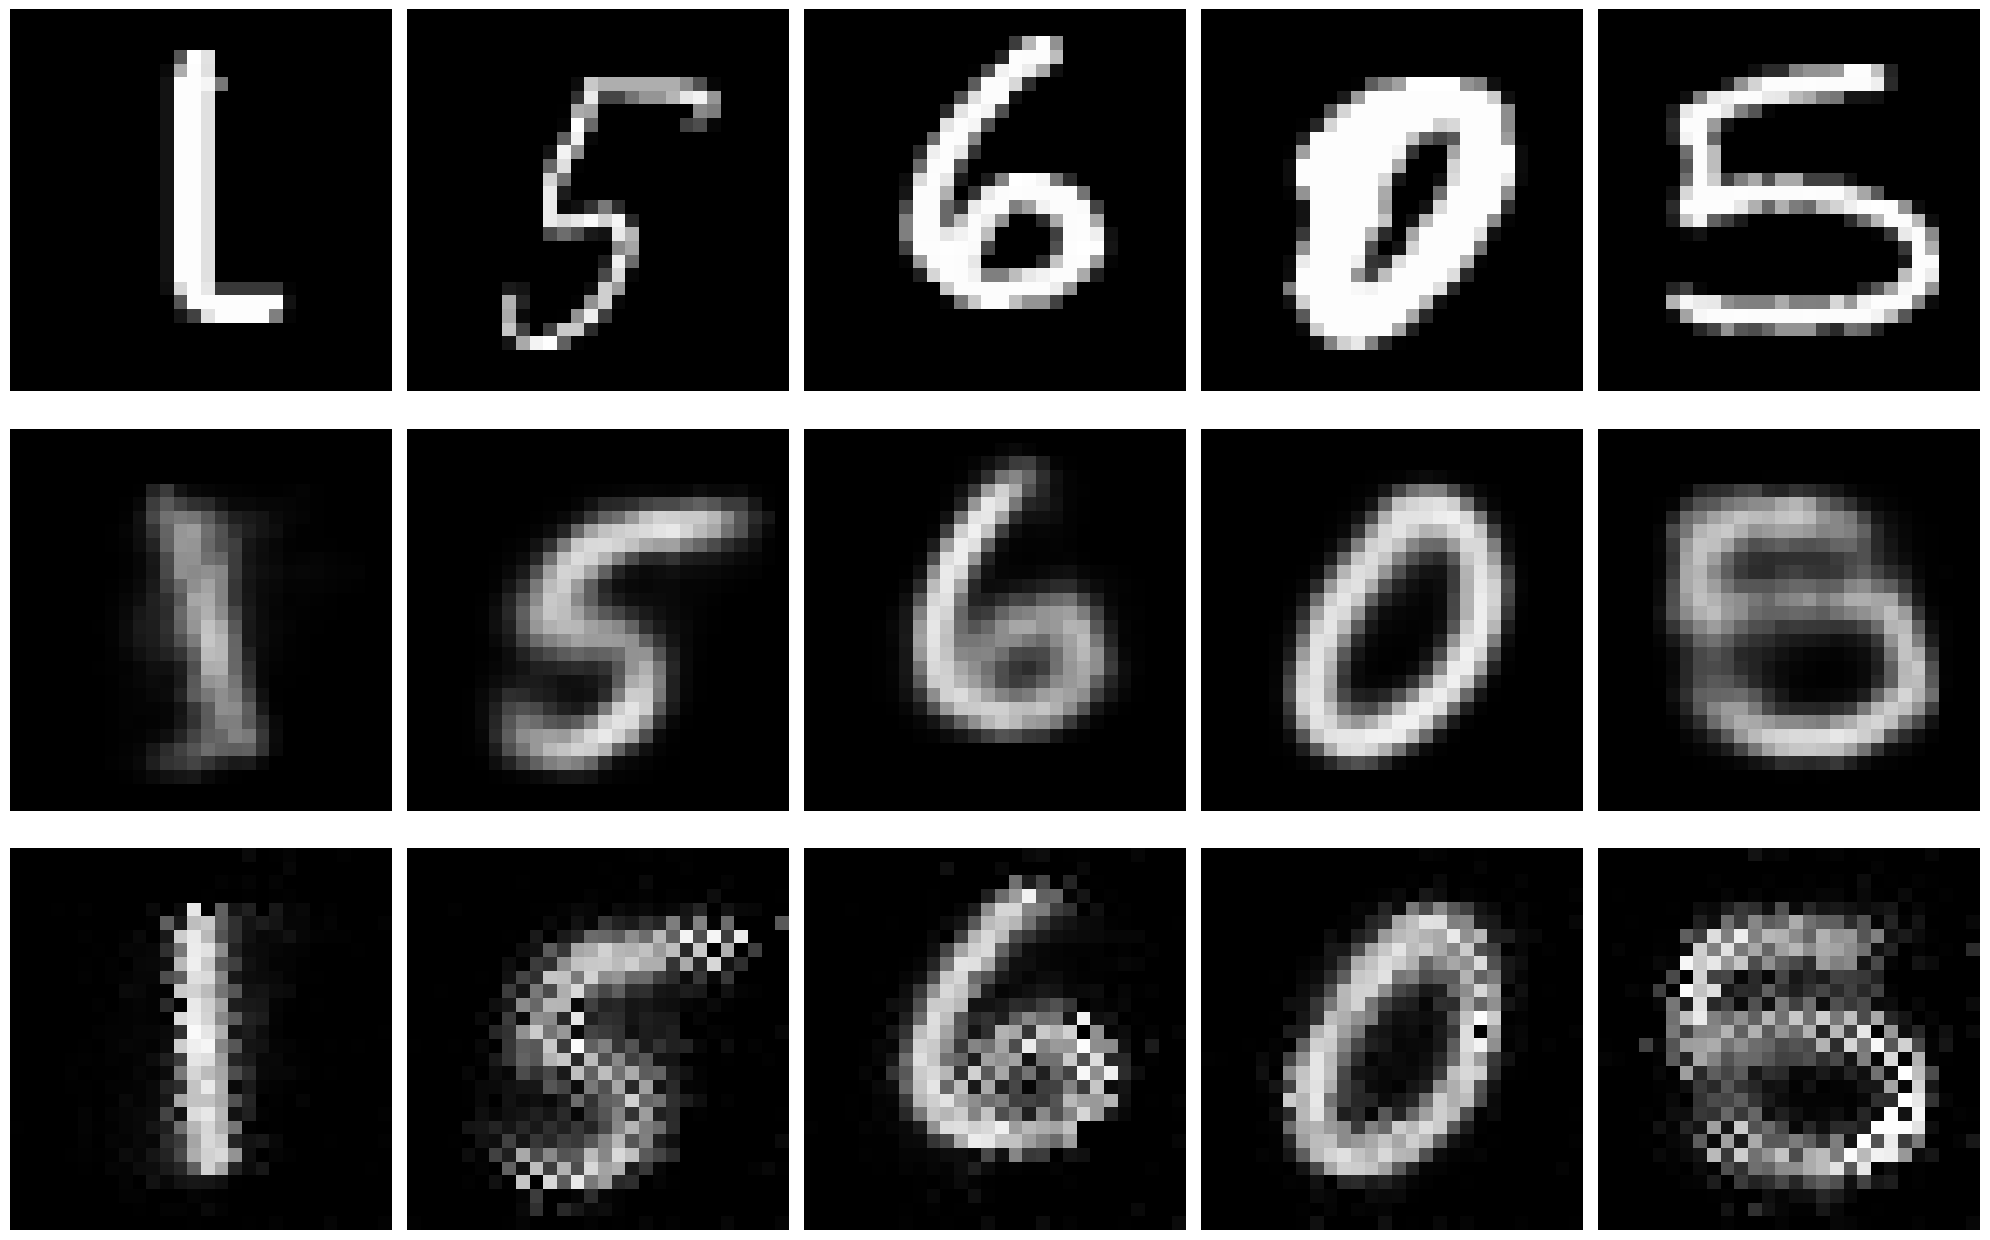

In [14]:
compare_with_vanilla(manager, 'pl 30')
# denoising cnn

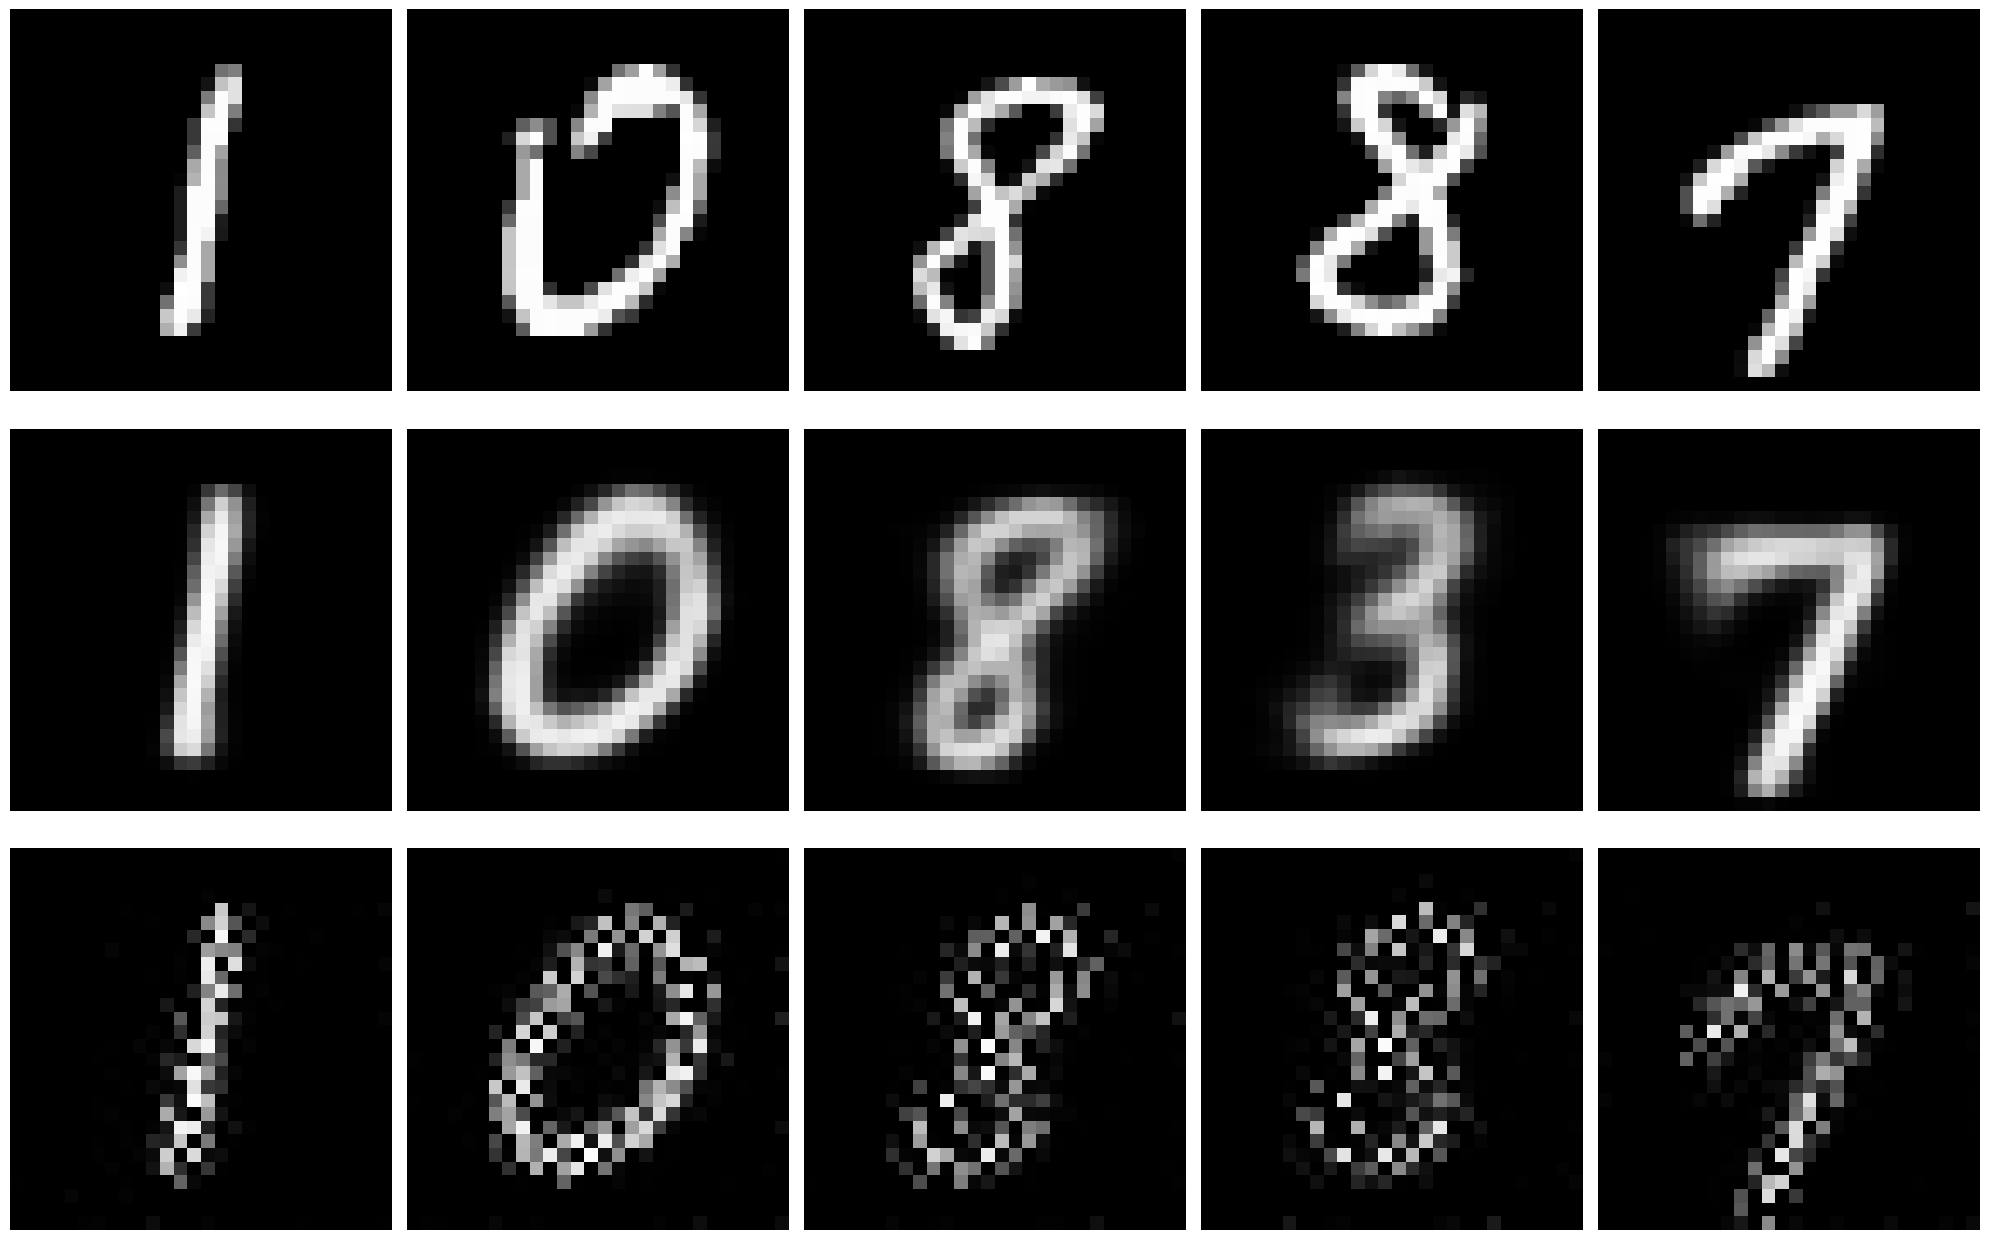

In [56]:
compare_with_vanilla(manager, 'pl 30')
# cnn 2~4 (1 단계의 필터 제외)

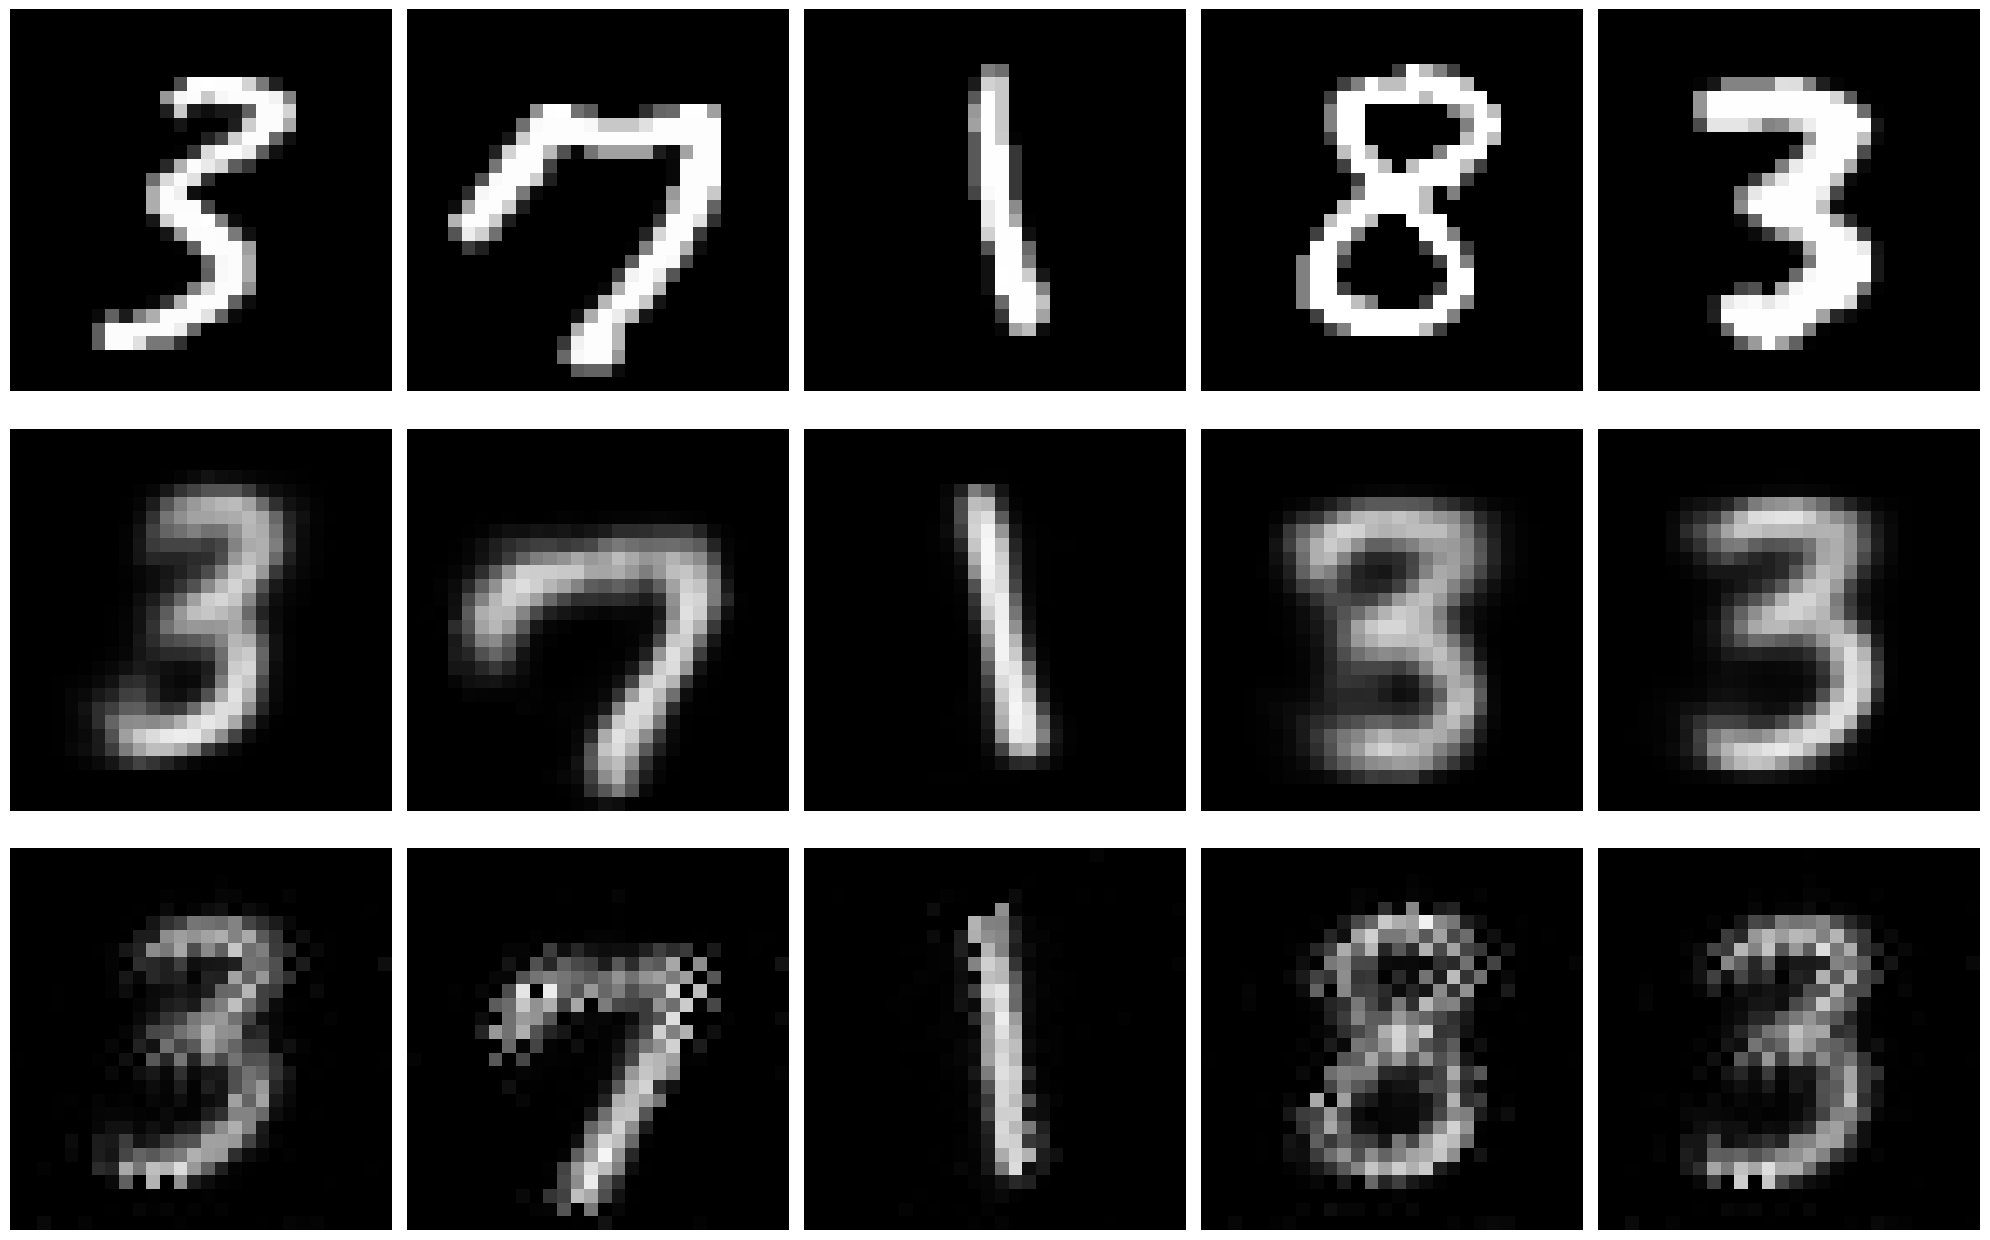

In [54]:
compare_with_vanilla(manager, 'pl 30')
# cnn 4

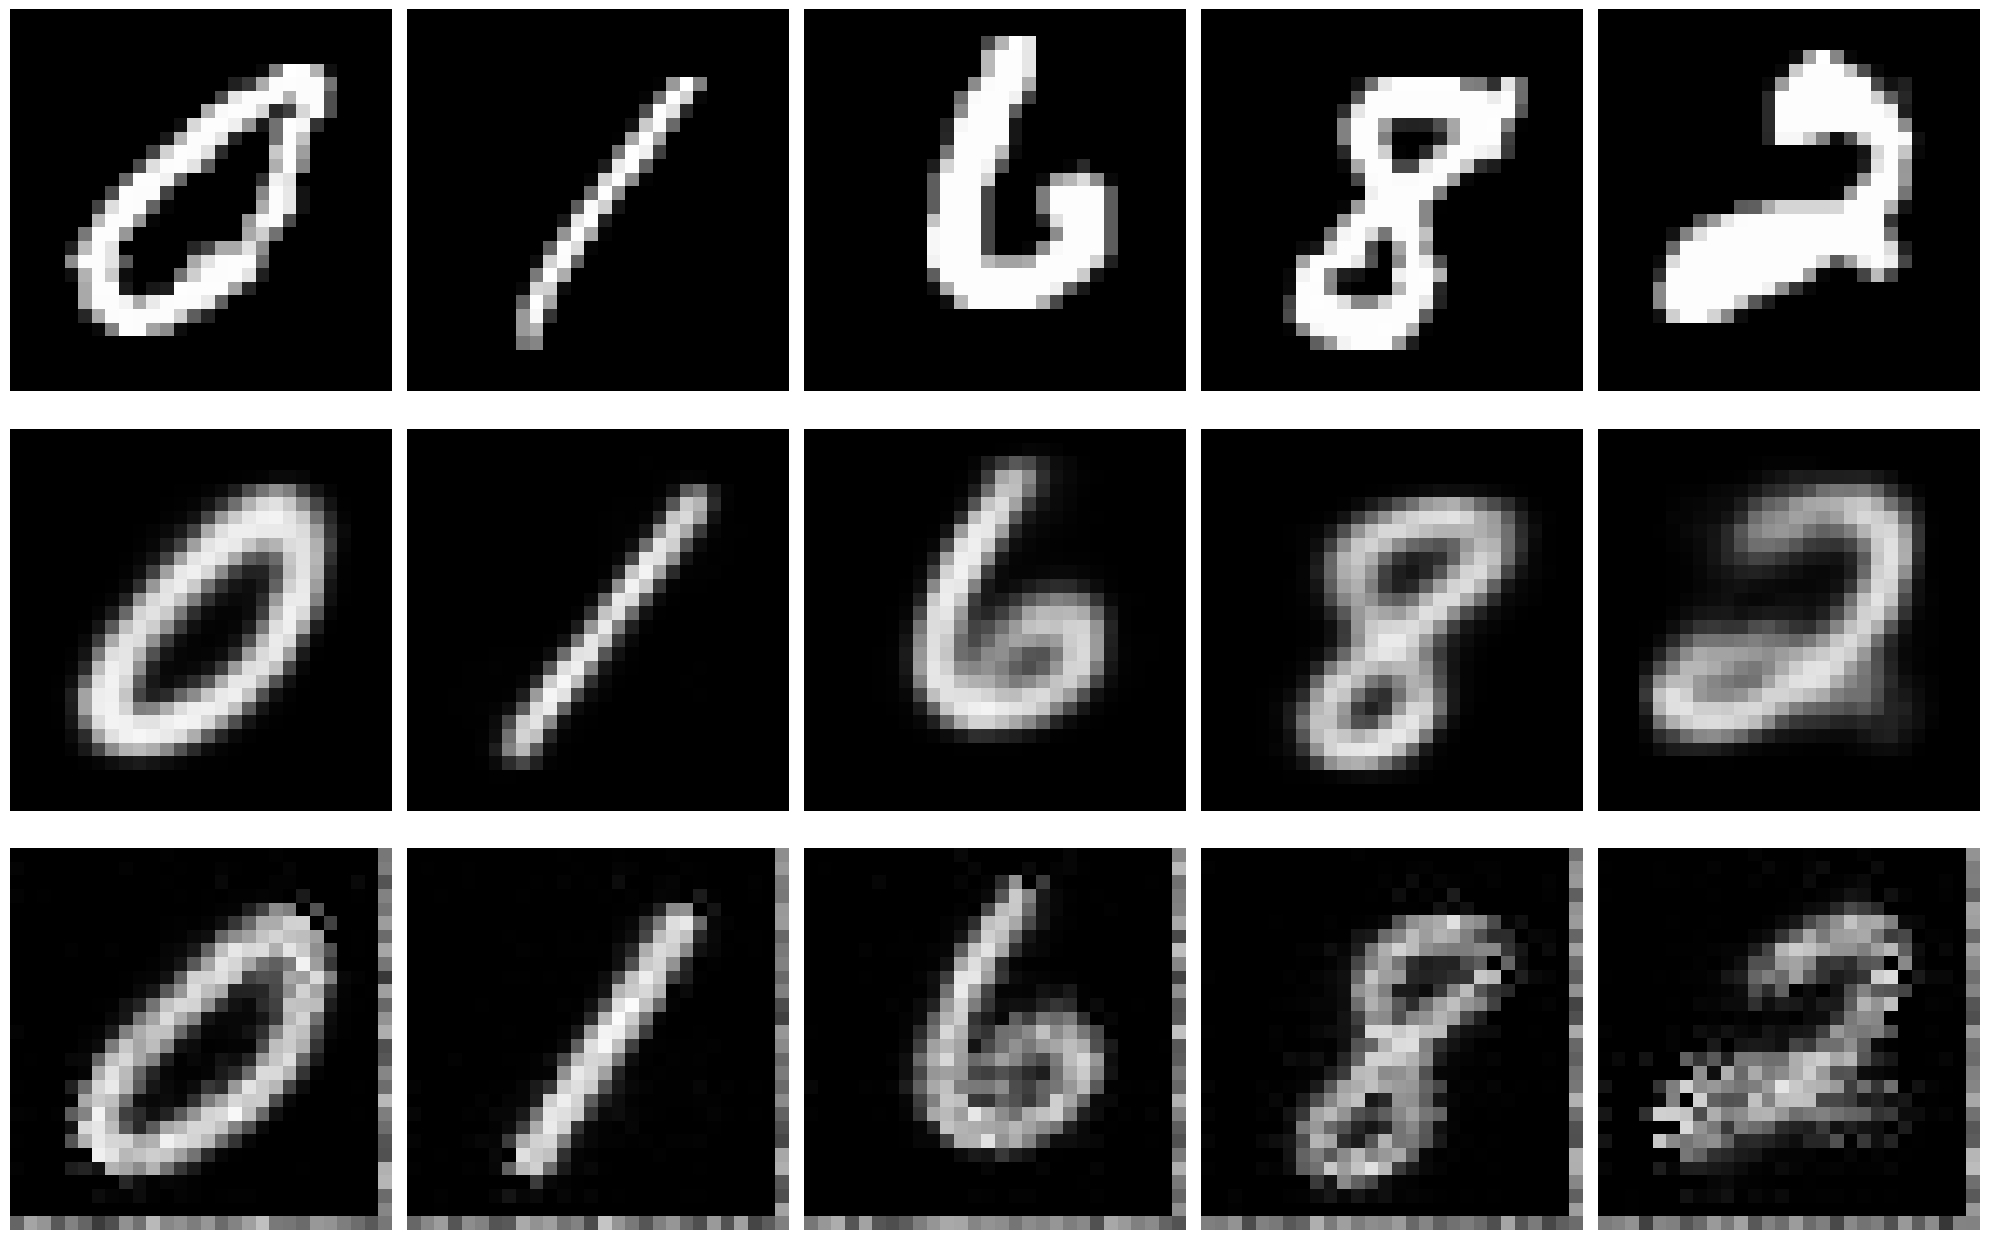

In [20]:
compare_with_vanilla(manager, 'pl 30')
# cnn 3

In [ ]:
class My_CNN(nn.Module):
    def __init__(self, activation="tanh"):
        super().__init__()

        if activation == "tanh":
            self.activation = torch.tanh
        elif activation == "sigmoid":
            self.activation = torch.sigmoid
        elif activation == "relu":
            self.activation = torch.relu

        self.c0 = nn.Conv2d(1, 16, 3, 2)
        self.c1 = nn.Conv2d(16, 32, 3, 2)
        self.c2 = nn.Conv2d(32, 64, 3, 2)
        self.fln = nn.Flatten()
        self.l0 = nn.Linear(256, 256)
        self.l1 = nn.Linear(256, 10)

    def forward(self, x):
        h = self.activation(self.c0(x))
        h = self.activation(self.c1(h))
        h = self.activation(self.c2(h))
        h = self.fln(h)
        h = self.activation(self.l0(h))
        h = self.l1(h)
        return h

    def get_perceptual_loss(self, x):
        h1 = self.activation(self.c0(x))
        h2 = self.activation(self.c1(h1))
        h3 = self.activation(self.c2(h2))
        return h1, h2, h3


In [24]:
m = nn.Conv2d(1, 2, 3, stride=2, padding=1)
tx = torch.randn(10, 1, 28, 28)
output = m(tx)
print(output.shape)

torch.Size([10, 2, 14, 14])
